In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pyqpanda import *
from scipy.stats import unitary_group

%matplotlib inline


def draw(prog):
    draw_qprog(prog, "pic", filename="a.png")
    plt.imshow(plt.imread("a.png"))
    plt.axis("off")
    plt.show()

In [63]:
def geth(a, b, c, M, N, m, n, alpha, beta):
    h = [0] * (M + N + 1)
    for i in range(1, M + 1):
        for j in range(1, N + 1):
            h[j + M] += -2 * a * A * alpha[i, j] - 2 * b * B * beta[i, j]
            for k in range(1, M + 1):
                for l in range(1, N + 1):
                    h[max(j, l) + M] += (
                        a * alpha[i, j] * alpha[k, l] + b * beta[i, j] * beta[k, l]
                    )
    for i in range(1, M + 1):
        h[i] += -2 * c * m
        for k in range(1, M + 1):
            h[max(i, k)] += c
    for j in range(N + 1):
        h[j + M] += -2 * c * n
        for l in range(1, N + 1):
            h[max(j, l) + M] += c
    return h

In [75]:
a = 1
b = 1
c = 100
M = 5
N = 5
m = 3
n = 2
A = 3
B = 3
alpha = abs(np.random.randn(M + 1, N + 1))
beta = abs(np.random.randn(M + 1, N + 1));

In [76]:
h = geth(a, b, c, M, N, m, n, alpha, beta)

In [77]:
h

[0,
 -500,
 -300,
 -100,
 100,
 -100,
 -216.46174753270878,
 41.96669785143223,
 280.15442746186375,
 549.8579040774521,
 748.4429839349884]

In [87]:
U = np.eye(2 ** (M + N), dtype="complex128")

In [88]:
gamma = 1
for t in range(1, M + N):
    U[2**t - 1, 2**t - 1] = np.exp(-1j * gamma * h[t])

In [89]:
U @ np.conj(U).T

array([[1.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 1.+0.j]])

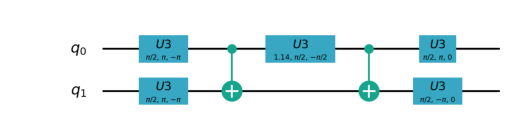

In [21]:
machine = CPUQVM()
machine.init_qvm()

q = machine.qAlloc_many(2)

U = np.diag([np.exp(-1j), np.exp(1j), np.exp(1j), np.exp(-1j)])

prog = QProg()
prog << matrix_decompose(q, U)
#prog<< RZ(q[0],1)<<BARRIER(q[1])<<RZ(q[1],1)

convert_single_gates = ["U3"]
convert_double_gates = ["CNOT"]

# Perform quantum gate conversion
new_qprog = transform_to_base_qgate(
    prog, machine, convert_single_gates, convert_double_gates
)

# Print the new quantum program
draw(new_qprog)

In [103]:
new_qprog.get_qgate_num()

2053

In [99]:
draw_probability_map(new_qprog)

TypeError: 'module' object is not callable

In [ ]:
print(new_qprog)

[(1+0j), 0j, 0j, 0j, 0j, (1+0j), 0j, 0j, 0j, 0j, (1.0000000000000002+1.6653345369377348e-16j), 0j, 0j, 0j, 0j, (-0.41614683654714235+0.9092974268256817j)]


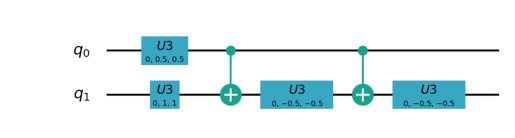

In [21]:
machine = CPUQVM()
machine.init_qvm()

q = machine.qAlloc_many(3)
c = machine.cAlloc_many(3)

M = np.diag([1, 1, 1, 1, 1, 1, 1, np.exp(1j)])

prog = QProg()
prog << CR(q[0], q[1], 2)  # matrix_decompose(q, M)

convert_single_gates = ["U3"]
convert_double_gates = ["CNOT"]

# Perform quantum gate conversion
new_qprog = transform_to_base_qgate(
    prog, machine, convert_single_gates, convert_double_gates
)

print(get_unitary(new_qprog))

# Print the new quantum program
draw(new_qprog)

[(1+0j), 0j, 0j, 0j, 0j, (0.5403023058681398+0.8414709848078965j), 0j, 0j, 0j, 0j, (0.5403023058681398-0.8414709848078965j), 0j, 0j, 0j, 0j, (1+0j)]


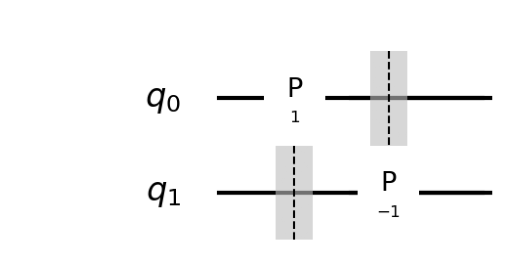

In [6]:
machine = CPUQVM()
machine.init_qvm()

q = machine.qAlloc_many(2)
c = machine.cAlloc_many(2)

M = np.diag([1, np.exp(-1j)])

prog = QProg()
prog << P(q[0], 1) << BARRIER(q[1]) << P(q[1], -1) << BARRIER(q[0])

convert_single_gates = ["U3", "BARRIER"]
convert_double_gates = ["CNOT"]

# Perform quantum gate conversion
# new_qprog = transform_to_base_qgate(
#     prog, machine, convert_single_gates, convert_double_gates
# )
print(get_unitary(prog))

# Print the new quantum program
draw(prog)

In [47]:
print(M @ np.conj(M).T)

[[1.+0.00000000e+00j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 1.-2.34195863e-17j]]


In [48]:
print(unitary_matrix @ np.conj(unitary_matrix).T)

NameError: name 'unitary_matrix' is not defined

[(0.9921976672293293+0.12467473338522755j), (-1.2836953722228372e-16-1.1102230246251565e-16j), (-6.938893903907228e-18+0j), 0j, 0j, 0j, 0j, 0j, (6.938893903907228e-17-2.7755575615628914e-17j), (0.9921976672293291+0.12467473338522778j), (-2.7755575615628914e-17-6.938893903907228e-18j), (-2.7755575615628914e-17-2.7755575615628914e-17j), 0j, 0j, 0j, 0j, (5.714703421963786e-17+1.4592033509726632e-17j), (-8.583549123368608e-19+3.3615902482139912e-18j), (0.9921976672293292+0.12467473338522801j), (-7.338035025164019e-17-1.3332153531295353e-16j), 0j, 0j, 0j, 0j, 0j, (5.378544397142386e-17+1.3733678597389772e-17j), (1.144377272415426e-16+5.746352090676148e-19j), (0.43117651679866564+0.9022675940990954j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.43117651679866625+0.902267594099095j), (-1.2584408179254544e-17-1.7509001051166135e-16j), 0j, 0j, 0j, 0j, 0j, 0j, (5.378544397142386e-17+1.3733678597389772e-17j), (0.4311765167986662+0.9022675940990952j), (6.866839298694886e-18-2.689272198571193e-17j), (2.6892

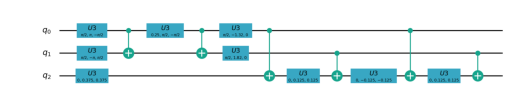

In [11]:
machine = CPUQVM()
machine.init_qvm()

q = machine.qAlloc_many(3)
c = machine.cAlloc_many(3)

M = np.diag([1, 1, 1, np.exp(1j), np.exp(1j), np.exp(1j), np.exp(1j), np.exp(1j)])

prog = QProg()
prog << matrix_decompose(q, M)

convert_single_gates = ["U3"]
convert_double_gates = ["CNOT"]

# Perform quantum gate conversion
new_qprog = transform_to_base_qgate(
    prog, machine, convert_single_gates, convert_double_gates
)

print(get_unitary(new_qprog))

# Print the new quantum program
draw(new_qprog)